# Content
Time series clustering using K means with Euclidean and DTW distance

How to decide the number of clusters ?

How can we calculate performance of clustering ?

In [53]:
%matplotlib inline
from tslearn.clustering import silhouette_score
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 8]

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import pandas as pd
import matplotlib


tslearn is a Python package that provides machine learning tools for the analysis of time series.

In [54]:
data = pd.read_csv('./data/data_long.csv')

def listify(row):
    row = str(row).replace('[', '').replace(']', '').split(',')
    row = [float(y) for y in row]

    return np.asarray(row)

data.loc[:, 'points'] = data.loc[:, 'points'].apply(listify)

In [55]:
points = data['points']

In [56]:

points = np.array(points.values.tolist())
points.resize(points.shape[0], 900, 1)
print(points.shape)

(1728, 900, 1)


## Note on pre-processing
**In this example, time series are preprocessed using TimeSeriesScalerMeanVariance.** 
This scaler is such that each output time series has zero mean and unit variance. 
The assumption here is that the range of a given time series is uninformative and one only wants to compare shapes.

In [57]:
seed = 10
np.random.seed(seed)
X_train = points
sz = X_train.shape[1]

In [58]:

print(np.mean(X_train[1,:]))
print(np.std(X_train[1,:]))

64.16760421441155
31.99767459851701


## plot
Let's plot data, as groups based on provided labels

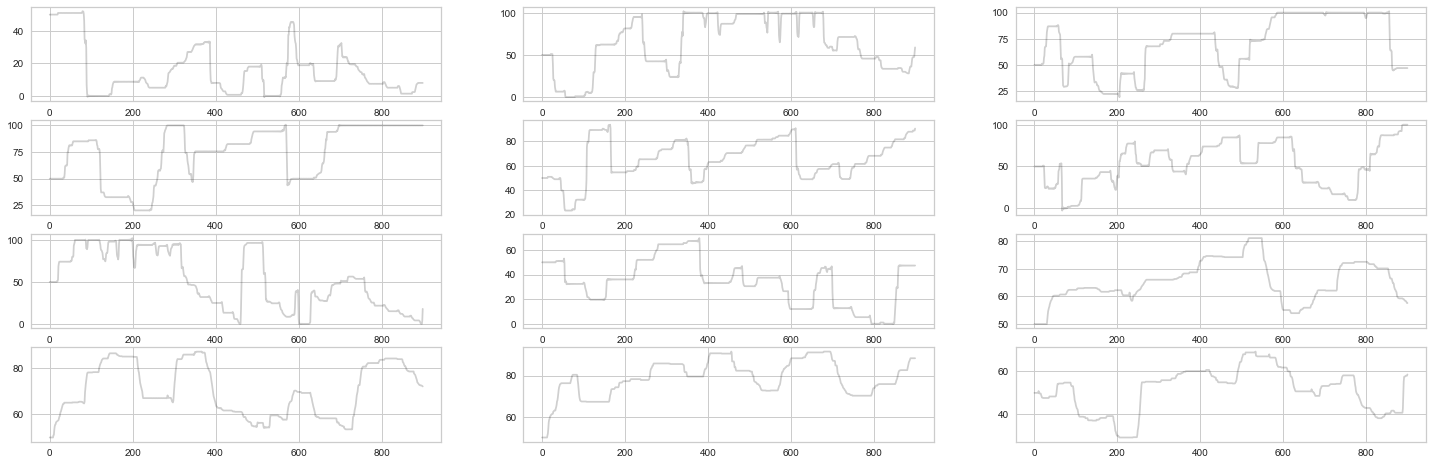

In [59]:
for yi in range(12):
    plt.subplot(4, 3, yi + 1)
    plt.plot(X_train[yi].ravel(), "k-", alpha=.2)
#     plt.text(0.55, 0.85,'Class Label: %d' % (y_train[yi]))

## No. of clusters decision

### Using inertia (sum of squared distances)

In [ ]:
####################################### Getting number of optimal clusters #######################################

Sum_of_squared_distances = []
K = [5, 10, 15, 20, 25, 27]
for k in K:
    km = TimeSeriesKMeans(n_clusters=k,
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=0,
                          n_jobs=-1)

    km = km.fit(X_train)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Training the model
  - using Euclidean distance

In [60]:
# Euclidean k-means

seed = 10
np.random.seed(seed)


n_clusterss = [27]

for n_clusters in n_clusterss:
    print("Euclidean k-means ---- {}".format(n_clusters))
    km = TimeSeriesKMeans(n_clusters=n_clusters, verbose=False, random_state=seed, n_jobs=-1)
    cluster_labels = km.fit_predict(X_train)

    centers = []
    for i in range(0, 27):
        centers.append(list(km.cluster_centers_[i].flatten()))

    pd.DataFrame(np.asarray(centers).transpose()).to_csv("./data/cluster_centers.csv")

    print("Euclidean silhoutte: {:.2f}".format(silhouette_score(X_train, cluster_labels, metric="euclidean")))

    # Plot each average curve independently:
    for yi in range(n_clusters):
        plt.plot(km.cluster_centers_[yi].ravel(), "r-", linewidth=40)
        plt.tight_layout()

        plt.xlim(0, sz)
        plt.ylim(0, 100)
        plt.axis('off')

        fig = matplotlib.pyplot.gcf()
        fig.set_size_inches(18.5, 18.5)

        plt.savefig("./plots/cluster/cluster_{}_{}.png".format(yi, n_clusters))
        plt.close()

    plt.figure()
    for yi in range(n_clusters):
        plt.subplot(9, 3, yi + 1)
        for xx in X_train[cluster_labels == yi]:
            plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.plot(km.cluster_centers_[yi].ravel(), "r-")

        plt.xlim(0, sz)
        plt.ylim(0, 100)
        plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
                 transform=plt.gca().transAxes)
        if yi == 1:
            plt.title("Euclidean $k$-means")

        print("Cluster {} done!".format(yi))

    data['cluster_labels'] = cluster_labels
    data.to_csv("./data/data_long_cluster_{}.csv".format(str(n_clusters)))
    plt.tight_layout()

    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(10, 20)

    plt.savefig("./plots/cluster/k_means_{}.png".format(str(n_clusters)), dpi=1000)
    plt.close()

Euclidean k-means ---- 27
Euclidean silhoutte: 0.11
Cluster 0 done!
Cluster 1 done!
Cluster 2 done!
Cluster 3 done!
Cluster 4 done!
Cluster 5 done!
Cluster 6 done!
Cluster 7 done!
Cluster 8 done!
Cluster 9 done!
Cluster 10 done!
Cluster 11 done!
Cluster 12 done!
Cluster 13 done!
Cluster 14 done!
Cluster 15 done!
Cluster 16 done!
Cluster 17 done!
Cluster 18 done!
Cluster 19 done!
Cluster 20 done!
Cluster 21 done!
Cluster 22 done!
Cluster 23 done!
Cluster 24 done!
Cluster 25 done!
Cluster 26 done!


 # Training the model
  - Using DTW (Dynamic Time Warping) Distance

In [ ]:
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=27,
                          metric="dtw",
                          verbose=True,
                          random_state=seed,
                          n_jobs=-1)
y_pred_dba_km = dba_km.fit_predict(X_train)
print("DBA silhoutte: {:.2f}".format(silhouette_score(X_train, y_pred_dba_km, metric="dtw")))

for yi in range(n_clusters):
    plt.subplot(9, 3, yi+1)
    for xx in X_train[y_pred_dba_km == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

    print("Cluster {} done!".format(yi))

data['cluster_labels'] = y_pred_dba_km
data.to_csv("./data/data_long_cluster_{}_dtw.csv".format(str(n_clusters)))
plt.tight_layout()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 20)


plt.tight_layout()
plt.savefig("./plots/dba_k_means.png", dpi=1000)
plt.close()
